# Machine Learning Lifecycle Example

## 1. Define Objectve
*Objective*: Infere how IQ, Years Experience and Age affects income using linear model

## 2. Collect Data

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import DataFrame as DF

C:\Apps\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# create dataset
np.random.seed(555)
X1 = np.random.normal(100,15,200).astype(int) # IQ -> 
X2 = np.random.normal(10,4.5,200) # Years of Experience -> 10 with SD of 4.5
X3 = np.random.normal(32,4,200).astype(int) # Age -> Mean of 32 and SD of 4
dob = np.datetime64('2017-10-31') - 365*X3
b = 5 # intercept
er = np.random.normal(0, 1.5, 200)

Y = np.array([0.3*x1 + 1.5*x2 + 0.83*x3 + b + e for x1,x2,x3,e in zip(X1,X2,X3,er)]) # true values of model


In [11]:
cols = ['iq', 'years_exp', 'dob']
df = DF(list(zip(X1, X2, dob)), columns=cols)
df['income'] = Y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
iq           200 non-null int64
years_exp    200 non-null float64
dob          200 non-null datetime64[ns]
income       200 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 6.3 KB


In [12]:
df.describe()

,iq,years_exp,income
count,200.000000,200.000000,200.000000
mean,98.895000,9.708405,75.177962
std,14.991253,4.654536,8.889551
min,62.000000,-5.789565,49.467100
25%,88.500000,6.603565,69.391361
50%,99.000000,10.021919,75.180707
75%,108.250000,12.927809,80.739804
max,134.000000,21.889216,98.380710


In [14]:
df = df[df.years_exp >= 0]
df.describe()

,iq,years_exp,income
count,196.000000,196.000000,196.000000
mean,98.959184,9.963718,75.603845
std,14.769628,4.332578,8.424493
min,62.000000,0.084480,54.325402
25%,88.500000,6.940314,69.619532
50%,99.000000,10.192384,75.327426
75%,108.250000,12.967590,80.798796
max,134.000000,21.889216,98.380710


## 4.EDA

In [15]:
df.describe(include=['datetime64'])

,dob
count,196
unique,22
top,1986-11-08 00:00:00
freq,20
first,1975-11-11 00:00:00
last,1996-11-05 00:00:00


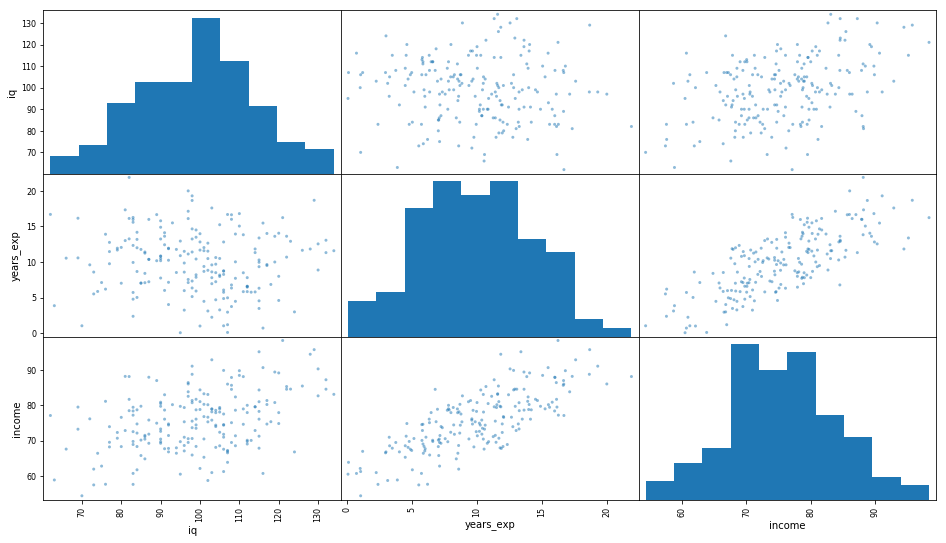

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(df, figsize=(16,9));

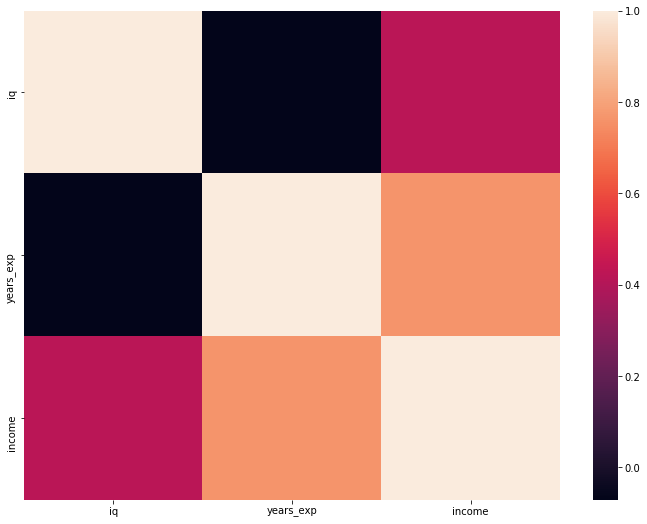

In [25]:
import seaborn as sns
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

## 5. Data Processing / Feature Engineering